In [1]:
# Importing required libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
# Load the dataset
df = pd.read_csv('/kaggle/input/plane-price-prediction/Plane Price.csv')

# Display the first few rows of the dataset
df.head()


,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
0,100 Darter (S.L. Industries),Piston,145,104,91.0,46.0,36,450,900.0,1300.0,"2,050","1,180",25/3,37/5,370,1300000.0
1,7 CCM Champ,Piston,85,89,83.0,44.0,15,600,720.0,800.0,"1,350",820,20/7,36/1,190,1230000.0
2,100 Darter (S.L. Industries),Piston,90,90,78.0,37.0,19,650,475.0,850.0,"1,300",810,21/5,35/0,210,1600000.0
3,7 AC Champ,Piston,85,88,78.0,37.0,19,620,500.0,850.0,"1,300",800,21/5,35/0,210,1300000.0
4,100 Darter (S.L. Industries),Piston,65,83,74.0,33.0,14,370,632.0,885.0,"1,220",740,21/5,35/0,175,1250000.0


In [3]:
# Display summary statistics of numeric columns
summary_stats = df.describe()
print(summary_stats)

       Rcmnd cruise Knots  Stall Knots dirty  Fuel gal/lbs  \
count          507.000000         502.000000    517.000000   
mean           200.792899          60.795817   1419.379110   
std            104.280532          16.657002   4278.320773   
min             70.000000          27.000000     12.000000   
25%            130.000000          50.000000     50.000000   
50%            169.000000          56.000000     89.000000   
75%            232.000000          73.000000    335.000000   
max            511.000000         115.000000  41000.000000   

       Eng out rate of climb  Takeoff over 50ft         Price  
count             491.000000         492.000000  5.070000e+02  
mean             2065.126273        1743.306911  2.362673e+06  
std              1150.031899         730.009674  1.018731e+06  
min               457.000000         500.000000  6.500000e+05  
25%              1350.000000        1265.000000  1.600000e+06  
50%              1706.000000        1525.000000  2.000000

In [4]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

Model Name                  0
Engine Type                 0
HP or lbs thr ea engine     0
Max speed Knots            20
Rcmnd cruise Knots         10
Stall Knots dirty          15
Fuel gal/lbs                0
All eng rate of climb       4
Eng out rate of climb      26
Takeoff over 50ft          25
Landing over 50ft           0
Empty weight lbs            1
Length ft/in                0
Wing span ft/in             0
Range N.M.                 18
Price                      10
dtype: int64


In [5]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)


Number of duplicate rows: 0


**What is the distribution of the 'Price' column?**

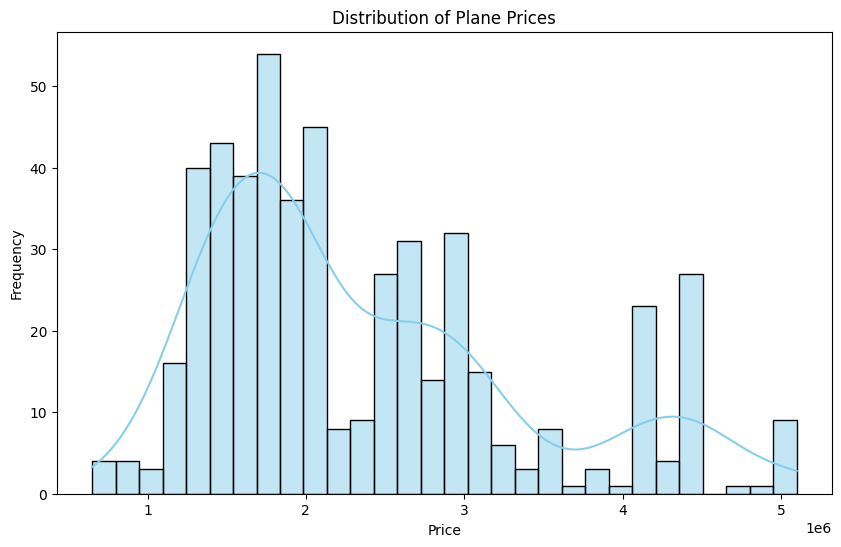

In [6]:
# Plot the distribution of the 'Price' column
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Plane Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


**How are different 'Engine Type' categories distributed in the dataset?**

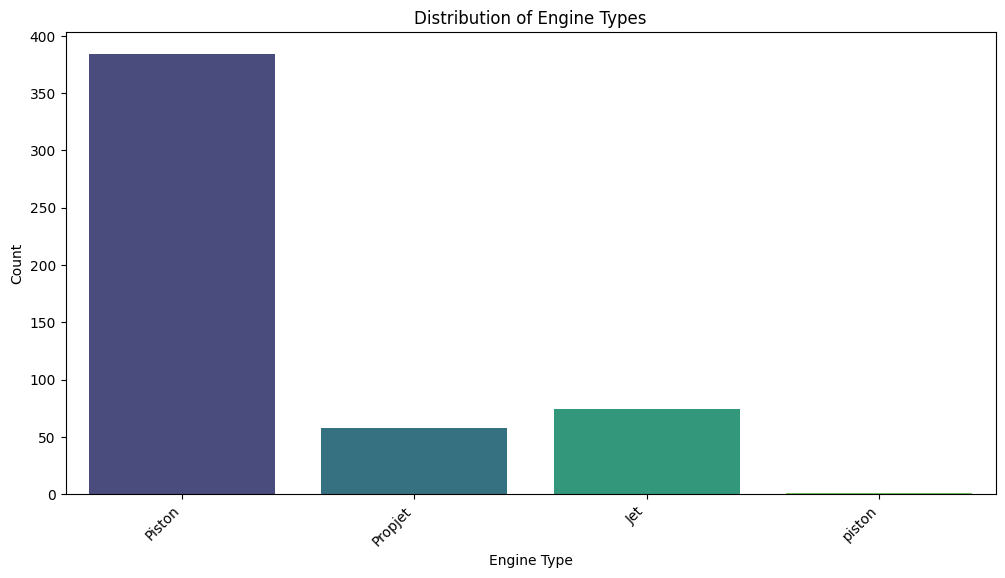

In [7]:
# Plot the distribution of 'Engine Type'
plt.figure(figsize=(12, 6))
sns.countplot(x='Engine Type', data=df, palette='viridis')
plt.title('Distribution of Engine Types')
plt.xlabel('Engine Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


**What is the correlation matrix between the numeric features?**

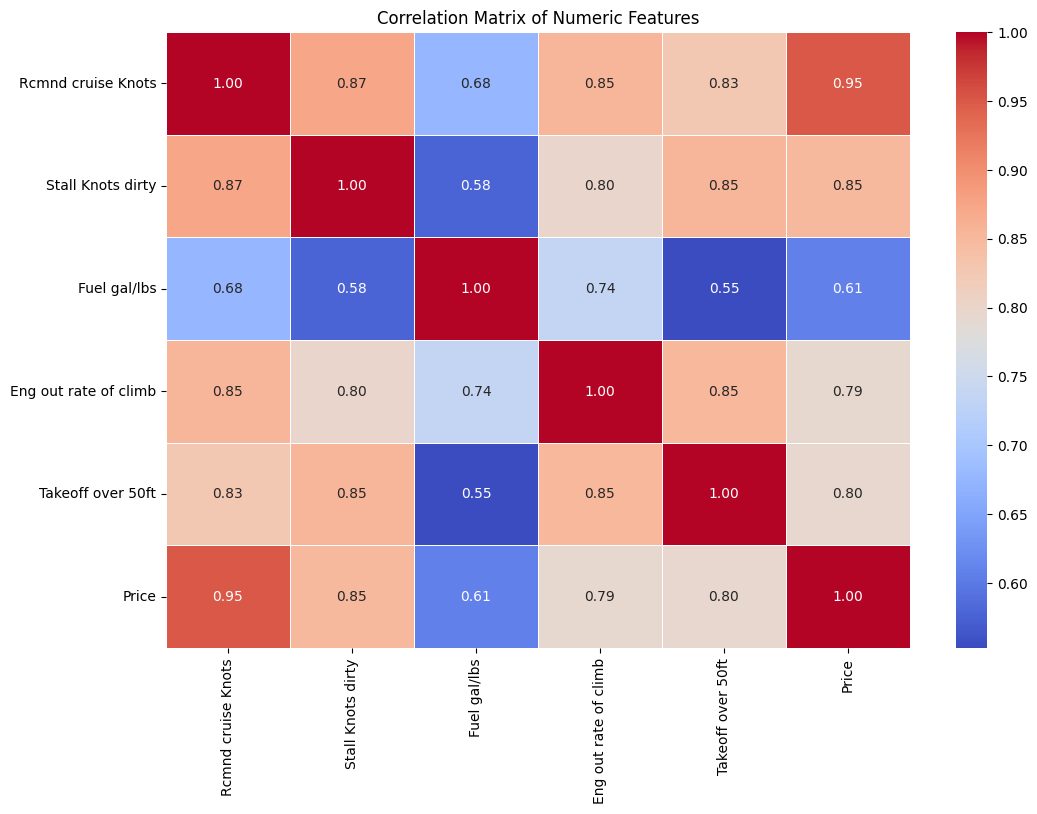

In [8]:
# Check for non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).columns

# If there are non-numeric columns, drop them or handle them accordingly
if not non_numeric_columns.empty:
    df_numeric = df.drop(columns=non_numeric_columns)
    # Alternatively, you can convert categorical columns to numerical using one-hot encoding
    # df_numeric = pd.get_dummies(df, columns=non_numeric_columns)

    # Calculate and plot the correlation matrix for numeric data
    correlation_matrix = df_numeric.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix of Numeric Features')
    plt.show()
else:
    # All columns are numeric, proceed with the original code
    correlation_matrix = df.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix of Numeric Features')
    plt.show()


In [9]:
import plotly.express as px

**Distribution of 'Price' Column**

In [10]:
# Distribution of 'Price'
fig = px.histogram(df, x='Price', title='Distribution of Plane Prices', nbins=30, marginal='box')
fig.show()


**Embark on a thrilling quest to discover the missing values in each column**

In [11]:
# Missing values
missing_values = df.isnull().sum()
fig = px.bar(x=missing_values.index, y=missing_values.values, title='The Quest for Missing Values')
fig.show()


**Embark on a data-driven quest to decode the mysteries behind the 'Max Speed Knots' feature. How does this variable correlate with the enigmatic plane prices?**

In [12]:
# Check unique values in 'Max speed Knots' column
print(df['Max speed Knots'].unique())

# Identify problematic entries and handle them
df['Max speed Knots'] = pd.to_numeric(df['Max speed Knots'], errors='coerce')

# Scatter plot of 'Max speed Knots' vs 'Price' after handling the issue
fig = px.scatter(df, x='Max speed Knots', y='Price', trendline='ols')
fig.show()

['104' '89' '90' '88' '83' '78' '264' '262' '257' '271' '220' nan '128'
 '114' '112' '113' '99' '120' '147' '116' '109' '97' '117' '85' '168'
 '148' '136' '130' '126' '122' '138' '157' '158' '335' '314' '310' '294'
 '290' '265' '248' '279' '267' '250' '247' '223' '243' '214' '216' '219'
 '208' '200' '246' '249' '204' '203' '209' '186' '178' '177' '261' '256'
 '231' '252' '210' '201' '205' '183' '171' '213' '184' '179' '217' '182'
 '169' '165' '160' '181' '170' '145' '140' '137' '127' '123' '110' '106'
 '193' '174' '166' '167' '455' '457' '480' '491' '477' '471' '478' '475'
 '464' '461' '474' '469' '488' '.92 Mach' '.85 Mach' '473' '472'
 '.76 Mach' '.755 Mach' '.70 Mach' '.737 Mach' '.71 Mach' '295' '263'
 '245' '240' '235' '239' '232' '230' '229' '227' '226' '237' '238' '207'
 '206' '191' '211' '202' '172' '173' '159' '224' '175' '150' '155' '121'
 '156' '151' '154' '152' '153' '107' '105' '91' '94' '131' '103' '141'
 '187' '176' '143' '146' '144' '139' '133' '125' '132' '124' '96' '9

**Delve into the weighty matters of aviation! Is there a discernible relationship between the 'Empty weight lbs' and the prices of planes?**

In [13]:
# Check unique values in 'Empty weight lbs' column
print(df['Empty weight lbs'].unique())

# Identify problematic entries and handle them
df['Empty weight lbs'] = pd.to_numeric(df['Empty weight lbs'].str.replace(',', ''), errors='coerce')

# Scatter plot of 'Empty weight lbs' vs 'Price' after handling the issue
fig = px.scatter(df, x='Empty weight lbs', y='Price', trendline='ols')
fig.show()

['1,180' '820' '810' '800' '740' '786' '4,275' '4,125' '4,056' '3,958'
 '3,750' '3,737' '3,650' '3,160' '4,500' '3,100' '2,870' '2,410' '2,400'
 '2,300' '2,200' '930' '900' '833' '770' '1,260' '1,140' '1,050' '1,150'
 '1,290' '1,067' '750' '2,588' '1,360' '1,323' '1,271' '975' '1,007' '845'
 '1,190' '3,400' '3,700' '3,600' '622' '5829' '9,887' '9,051' '8830'
 '7,538' '7,082' '6,797' '6,440' '6,647' '6,549' '5,996' '5,765' '5,685'
 '5,680' '6,035' '5,277' '5,120' '4,900' '4,800' '4,995' '4,980' '4,640'
 '4,425' '4,175' '4,100' '5,845' '5,910' '6,150' '5,770' '4,480' '4,460'
 '3,956' '3,940' '3,800' '4,026' '3,985' '3,788' '3,780' '3,443' '3,361'
 '3,291' '3,075' '3,236' '2,960' '2,650' '2,635' '2,460' '2,338' '2,278'
 '2,247' '2,195' '1,980' '2,027' nan '1,960' '1,950' '1,915' '1,855'
 '1,832' '1,820' '1,722' '1,650' '1,575' '1,458' '1,935' '1,918' '2,125'
 '1,862' '1,775' '1,854' '1,745' '1,730' '1,696' '1,711' '1,610' '1,410'
 '1,494' '1,375' '1,325' '1,300' '1,414' '1,103' '2,372' '2

**Uncover the fascinating distribution of the 'All eng rate of climb'. How do planes fare when it comes to ascending to the skies?**

In [14]:
# Distribution of 'All eng rate of climb'
fig = px.histogram(df, x='All eng rate of climb', nbins=20, marginal='rug')
fig.show()


**Embark on an exploration of wingspans! Can we decipher any patterns between 'Wing span ft/in' and the captivating world of plane prices?**

In [15]:
# Check unique values in 'Wing span ft/in' column
print(df['Wing span ft/in'].unique())

# Function to convert 'ft/in' format to inches
def convert_to_inches(value):
    try:
        feet, inches = map(int, value.split('/'))
        return feet * 12 + inches
    except ValueError:
        return None

# Apply the conversion function to the 'Wing span ft/in' column
df['Wing span inches'] = df['Wing span ft/in'].apply(convert_to_inches)

# Scatter plot of 'Wing span inches' vs 'Price'
fig = px.scatter(df, x='Wing span inches', y='Price', trendline='ols')
fig.show()

['37/5' '36/1' '35/0' '36/8' '36/7' '34/2' '42/5' '35/11' '42/3' '35/8'
 '30/0' '27/0' '32/0' '34/5' '33/5' '34/3' '34/6' '35/1' '36/9' '31/6'
 '31/5' '24/5' '35/6' '44/4' '44/5' '35/5' '56' '54/5' '57/11' '54/6'
 '45/11' '45/10' '50/3' '45/1' '50/4' '39/3' '49/8' '49/6' '47/7' '45/9'
 '45/2' '37/10' '37/8' '37/1' '37/9' '38/0' '33/6' '32/10' '32/9' '32/8'
 '32/7' '43/9' '61/10' '39/6' '39/5' '35/7' '63/9' '53/5' '53/6' '55/8'
 '54/1' '52/2' '53/4' '46/8' '47/1' '43/11' '49/4' '44/1' '41/1' '41/9'
 '39/9' '39/11' '46/4' '38/1' '36/11' '38/10' '38/2' '52/1' '36' '36/6'
 '36/5' '35/10' '36/10' '36/0' '36/2' '41/8' '40/9' '40/4' '16/0' '35/9'
 '33/2' '33/4' '33/3' '38/7' '35/2' '63/5' '42/11' '65/0' '44/6' '41/7'
 '32/6' '37/11' '29/11' '46/0' 'N/C' '57/0' '46/3' '47/11' '28' '20/6'
 '93/6' '77/10' '72/6' '68/11' '78/4' '47/0' '44/9' '44/8' '43/3' '32/5'
 '34/0' '28/9' '34/7' 'Orig' '32.9' '30/10' '29/8' '58/0' '43/6' '43/5'
 '39/2' '26/1' '34/9' '53/3' '47/8' '42/8']


**Discover the secrets of plane range! What tales do the distribution of 'Range N.M.' reveal about the vast distances these flying machines can cover?**

In [16]:
# Distribution of 'Range N.M.'
fig = px.histogram(df, x='Range N.M.', nbins=20, marginal='rug')
fig.show()


**Unmask the diversity within 'Engine Type' categories. How are the planes distributed across these engine variations?**

In [17]:
# Get value counts of 'Engine Type' column
engine_type_counts = df['Engine Type'].value_counts().reset_index()

# Rename the columns for clarity
engine_type_counts.columns = ['Engine Type', 'Count']

# Create a bar plot
fig = px.bar(engine_type_counts, x='Engine Type', y='Count', 
             labels={'Engine Type': 'Engine Type', 'Count': 'Count'})

fig.show()

**Venture into the mystery of stall speeds! How do the 'Stall Knots dirty' values unfold in their distribution, and is there any correlation with plane prices?**

In [18]:
# Distribution of 'Stall Knots dirty'
fig = px.histogram(df, x='Stall Knots dirty', nbins=20, marginal='rug')
fig.show()


**Fuel curiosity by exploring the 'Fuel gal/lbs' feature. How do planes differ in their fuel efficiency, and does it impact their price?**

In [19]:
# Scatter plot of 'Fuel gal/lbs' vs 'Price'
fig = px.scatter(df, x='Fuel gal/lbs', y='Price', trendline='ols')
fig.show()


**Unearth the drama of takeoff and landing! Investigate the relationship between 'Takeoff over 50ft' and 'Landing over 50ft'. How do these variables correlate with plane prices?**

In [20]:
# Scatter plot of 'Takeoff over 50ft' vs 'Landing over 50ft'
fig = px.scatter(df, x='Takeoff over 50ft', y='Landing over 50ft', color='Price')
fig.show()


**Unravel the dynamics between the length of planes and their prices. Is there a noticeable trend between 'Length ft/in' and 'Price'?**

In [21]:
import pandas as pd
import plotly.express as px

# Check unique values in 'Length ft/in' column
print(df['Length ft/in'].unique())

# Function to convert 'ft/in' format to inches
def convert_to_inches(value):
    try:
        feet, inches = map(int, value.split('/'))
        return feet * 12 + inches
    except ValueError:
        return None

# Apply the conversion function to the 'Length ft/in' column
df['Length inches'] = df['Length ft/in'].apply(convert_to_inches)

# Scatter plot of 'Length inches' vs 'Price'
fig = px.scatter(df, x='Length inches', y='Price', trendline='ols')
fig.show()


['25/3' '20/7' '21/5' '20/4' '34/10' '34/9' '25/6' '24/4' '3,150' '25/7'
 '20/2' '20/1' '20/0' '22/11' '22/7' '22/9' '22/8' '21/6' '21/11' '29/7'
 '22/0' '19/2' '19/3' '22/5' '29/4' '33/0' '20/10' '33/6' '46/1' '46/8'
 '43/10' '43/9' '39/11' '39/9' '39/10' '35/6' '36/6' '35/2' '33/3' '33/10'
 '35/1' '33/1' '31/5' '29/11' '29/10' '29/0' '28/3' '28/0' '27/0' '26/5'
 '25/1' '27/6' '26/4' '25/2' '25/5' '26/8' '25/9' '25/8' '24/0' '23/7'
 '23/6' '23/0' '21/2' '55/1' '68/5' '48/8' '48/7' '47/7' '47/6' '43/3'
 '43/2' '72/2' '55/5' '55/6' '51/10' '48/9' '48/11' '47/2' '50/2' '42/6'
 '43/6' '39/0' '35/10' '36/5' '36/1' '33/8' '33/5' '36/4' '33/9' '39/6'
 '35/8' '34/4' '29/6' '29/5' '31/11' '29/3' '29/2' '27/1' '30/5' '29/1'
 '29/9' '37/6' '41/7' '28/4' '28/2' '27/3' '32/2' '29/8' '28/6' '28/8'
 '28/9' '27/8' '27/9' '26/6' '25/11' '26/3' '28/5' '28/1' '27/4' '26/0'
 '28/10' '25/0' '27/5' '26/11' '27/2' '26/10' '26/7' '24/1' '23/11' '23/9'
 '21/1' '21/0' '20/9' '30/7' '24/11' '24/10' '23/3' '66/4

**Uncover the intriguing interplay between wingspan and engine rate of climb. How do these factors contribute to the overall flying capabilities of planes?**

In [22]:
# Scatter plot of 'Wing span ft/in' vs 'All eng rate of climb'
fig = px.scatter(df, x='Wing span ft/in', y='All eng rate of climb', color='Engine Type')
fig.show()


**Embark on the weighty saga of landings! Is there a discernible pattern between the 'Landing over 50ft' distance and the 'Empty weight lbs' of planes?**

In [23]:
# Scatter plot of 'Landing over 50ft' vs 'Empty weight lbs'
fig = px.scatter(df, x='Landing over 50ft', y='Empty weight lbs', color='Engine Type')
fig.show()


**Climb to new heights by comparing 'Eng out rate of climb' and 'All eng rate of climb'. How do these climbing rates differ in the face of engine failures?**

In [24]:
# Scatter plot of 'Eng out rate of climb' vs 'All eng rate of climb'
fig = px.scatter(df, x='Eng out rate of climb', y='All eng rate of climb', color='Engine Type')
fig.show()


**Explore the cruising altitude of planes! How are 'Rcmnd cruise Knots' distributed, and is there any connection to the prices of planes?**

In [25]:
# Distribution of 'Rcmnd cruise Knots'
fig = px.histogram(df, x='Rcmnd cruise Knots', nbins=20, marginal='rug')
fig.show()


**Unveil the intricacies of takeoff performances! How do 'Takeoff over 50ft' and 'Empty weight lbs' interact to influence the takeoff characteristics of planes?**

In [26]:
# Scatter plot of 'Takeoff over 50ft' vs 'Empty weight lbs'
fig = px.scatter(df, x='Takeoff over 50ft', y='Empty weight lbs', color='Engine Type')
fig.show()
